Exercises from chapter 5!

**Exercise 1**: Suppose you are giving a talk in a large lecture hall and the fire marshal interrupts because they think the audience exceeds 1200 people, which is the safe capacity of the room.
You think there are fewer than 1200 people, and you offer to prove it. It would take too long to count, so you try an experiment:
* You ask how many people were born on May 11, and two people raise their hands.
* You ask how many were born on May 23 and 1 person raises their hand.
* Finally, you ask how many were born on August 1, and no one raises their hand.

How many people are in the audience? What is the probability that there are more than 1200 people? Hint: remember the binomial distribution.

Intuition: if there are 1200 people, there'd be an average of 1200 / 365 = 3.3 people with each birthday, so it's not likely that there are 1200 people.
Since the average is one person having a birthday on any given day (out of the three birthdays tested), there probably closer to 365 people in the lecture hall.

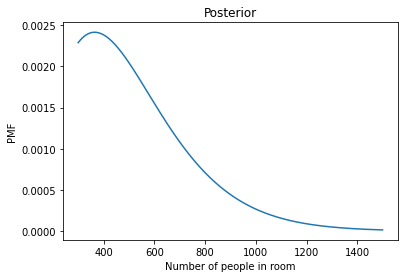

In [39]:
import numpy as np
from empiricaldist import Pmf
from scipy.stats import binom

# Choose uninformative prior
hypos = np.arange(300, 1500)
prior = Pmf(1, hypos)

def update_count(pmf, data):
    """Update pmf based on birthday counts"""
    hypos = pmf.qs
    p = (1 / 365)

    for m in data:
        # likelihood of m people having a given birthday for each value of hypos
        likelihood = binom.pmf(m, hypos, p)
        pmf *= likelihood
        pmf.normalize
    pmf.normalize()
    
posterior = prior.copy()

update_count(posterior, data = [2, 1, 0])

posterior.plot(xlabel = 'Number of people in room', ylabel = 'PMF', title = 'Posterior');

In [40]:
posterior.max_prob(), posterior.mean(), posterior.prob_ge(1201)



(365, 566.7069533176127, 0.01248652967252168)

In [46]:
## So the most likely value is 365, and based on our prior, the mean number of people is 567 and it's not likely (one-in-eight) that there's more than 1200 people.
# If we'd selected a lower bound to the prior, that number would be even lower

hypos = np.arange(200, 1500)
prior_2 = Pmf(1, hypos)
posterior_2 = prior_2.copy()
update_count(posterior_2, data = [2, 1, 0])

posterior_2.max_prob(), posterior_2.mean(), posterior_2.prob_ge(1201)

#posterior_2.plot(xlabel = 'Number of people in room', ylabel = 'PMF', title = 'Posterior_2');

(365, 515.1421740811313, 0.010436079599684917)

**Exercise 2**: I often see rabbits in the backyard of my apartment, but it's not easy to tell them apart, so I don't really know how many there are.

Suppose I deploy a motion-sensing camera trp that takes a pictures of the first rabbit I see each day. After three days, I campare the pictures and conclude that two of them are the same rabbit and the other is different.

How many rabbits visit my backyard?

To answer this question, we have the think about the prior distribution and the likelihood of the data:

* I've sometimes seen four rabbits at the same time, so I know there are at least that many. I'd be surprised if there were more than 10. So, as a starting place, a uniform prior from 4 to 10 is reasonable.

* To keep things simple, let's assume that all rabbits who visit my garden are equally likely to be caught by the camera trap in a given day. Let's also assume it is guaranteed that the camera trap gets a picture every day.

For each `n`, there's `n^3` possible outcomes. In `n` of them, you see the same rabbit three times. In `n * (n-1) * (n-2)` of them, you see three different rabbits. All other situations, you see one rabbit twice and one time you see another rabbit, as in the scenario being asked about.

Therefore, for a given `n`, the prob. of seeing the scenario described is `(n^3 - (n(n-1)(n-2) + n))/(n^3)`, which simplifies to `3(n - 1) / n^2`.

It makes sense, then, that the likelihood of seeing the first rabbit twice goes down when you have a larger population.

(4, 6.5099298137481725)

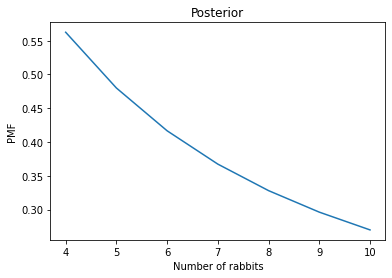

In [12]:
import numpy as np
from empiricaldist import Pmf

hypos = np.arange(4, 11)
prior = Pmf(1, hypos)

likelihood = 3 * (hypos - 1) / (hypos ** 2)

posterior = prior.copy()

posterior *= likelihood

posterior.plot(xlabel = 'Number of rabbits', ylabel = 'PMF', title = 'Posterior');

posterior.normalize()
posterior.max_prob(), posterior.mean()

Mean is 6.5, so best guess is 6 or 7 rabbits in the population.

**Exercise 3**: Suppose that in the criminal justice system, all prison sentences are either 1, 2, or 3 years, with an equal number of each. One day, you visit a prison and choose a prisoner at random. What is the probability that they are serving a 3-year sentence? What is the average remaining sentence of the prisoners you observe?

If there's an equal number of sentences of each length, then at any given time, there will be twice as many prisoners with 2-year terms as 1-year terms, and three times as many with 3-year vs. 1-year terms: `1/6` current prisoners have 1-year sentences, `1/3` have 2-year sentences, and `1/2` have 3-year sentences.

There's a 50% chance that a random prisoner has a 3-year sentence.

If the rate of people entering prison stays the same (sadly), then the average remaining sentence will be one-half of the time given. The average remaining sentence of the prisoners you observe will be `(1/2 * 1/6) + (1 * 1/3) + (1.5 * 1/2)`, which comes out to `7/6` years.

**Exercise 4**: If I chose a random adult in the US, what is the probability that they have a sibling? To be precise, what is the probability that their mother has had at least one other child?

This article from the __[Pew Research Center](https://www.pewresearch.org/social-trends/2015/05/07/family-size-among-mothers/)__ provides some relevant data.

Let's say that an adult is 19 or older. The linked research from Pew has cohorts from 1976, 1994 and 2014. Let's apply the 1994 metrics to everyone born between 1985 and 2002, and the 1976 metrics to everyone born 1984 or earlier. 

Based on __[https://www.kff.org/other/state-indicator/distribution-by-age/](this article)__, `100% - 23.6% = 76.4%` of the US population is 19+, `21.2%` is 19-34 (so we'll say they're in the 1994 cohort), and `55.2%` 36 or older, so they're in the 1976 cohort. We'll use these numbers to calculate weights.

Additionally, we'll estimate that the average family with 4+ children has 4.75 children.

In [19]:
weight_1976 = 55.2/76.4
weight_1994 = 21.2/76.4

# Probability person has sibling from 1976 cohort
sibling_1976 = ((.24 * 2) + (.25 * 3) + (.4 * 4.75)) / (.11 + (.24 * 2) + (.25 * 3) + (.4 * 4.75))

# Probability person has sibling from 1994 cohort
sibling_1994 = ((.43 * 2) + (.23 * 3) + (.13 * 4.75)) / (.21 + (.43 * 2) + (.23 * 3) + (.13 * 4.75))

(weight_1976 * sibling_1976) + (weight_1994 * sibling_1994)

# So the probability is about 95%. Next I'd ask, what %age of kids are third children!

0.9509603497497199

The __[Doomsday argument](https://en.wikipedia.org/wiki/Doomsday_argument)__ is “a probabilistic argument that claims to predict the number of future members of the human species given an estimate of the total number of humans born so far.”

Suppose there are only two kinds of intelligent civilizations that can happen in the universe. The “short-lived” kind go extinct after only 200 billion individuals are born. The “long-lived” kind survive until 2,000 billion individuals are born. And suppose that the two kinds of civilization are equally likely. Which kind of civilization do you think we live in?

The Doomsday argument says we can use the total number of humans born so far as data. According to the __[Population Reference Bureau](https://www.prb.org/articles/how-many-people-have-ever-lived-on-earth/)__, the total number of people who have ever lived is about 108 billion.

Since you were born quite recently, let’s assume that you are, in fact, human being number 108 billion. If N
is the total number who will ever live and we consider you to be a randomly-chosen person, it is equally likely that you could have been person 1, or `N`, or any number in between. So what is the probability that you would be number 108 billion?

Given this data and dubious prior, what is the probability that our civilization will be short-lived?

In [7]:
# "suppose that the two kinds of civilization are equally likely"; so we set a uniform prior
import numpy as np
from empiricaldist import Pmf

hypos = [200, 2000]
prior = Pmf(1, hypos)

# what's the likelihood that I am person number n = 108 billion if N = 200 billion? 2,000 billion? Since we're assuming it's "equally likely that you could have been person 1, or N, or any number in between", that probability is just 1 / N

# Relative probability is proportional to the hypotheticals, which is also why we used 200 and 2000 instead of 200b or 2000b

likelihood = 1 / prior.qs

posterior = prior * likelihood
posterior.normalize()

posterior

# So 1/11 chance of the "long-lived" civilization, 10/11 chance of "short-lived"

,probs
200,0.909091
2000,0.090909
